# Video Game Sales Exploratory Data Analysis

### Context

Dataset Link: link[Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales)

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.
Fields include
1. Rank - Ranking of overall sales
2. Name - The games name
3. Platform - Platform of the games release (i.e. PC,PS4, etc.)
4. Year - Year of the game's release
5. Genre - Genre of the game
6. Publisher - Publisher of the game
7. NA_Sales - Sales in North America (in millions)
8. EU_Sales - Sales in Europe (in millions)
9. JP_Sales - Sales in Japan (in millions)
10. Other_Sales - Sales in the rest of the world (in millions)
11. Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [45]:
df = pd.read_csv('../data/vgsales.csv')
rows_with_empty_years = df.loc[df['Year'].isnull()]
filtered_df = df.drop(rows_with_empty_years.index)
filtered_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


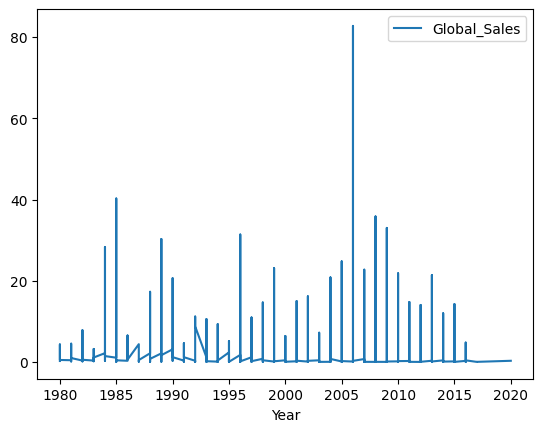

In [46]:
sorted_df = filtered_df.sort_values('Year')
sorted_df.plot(kind='line', x='Year', y='Global_Sales')
plt.show()

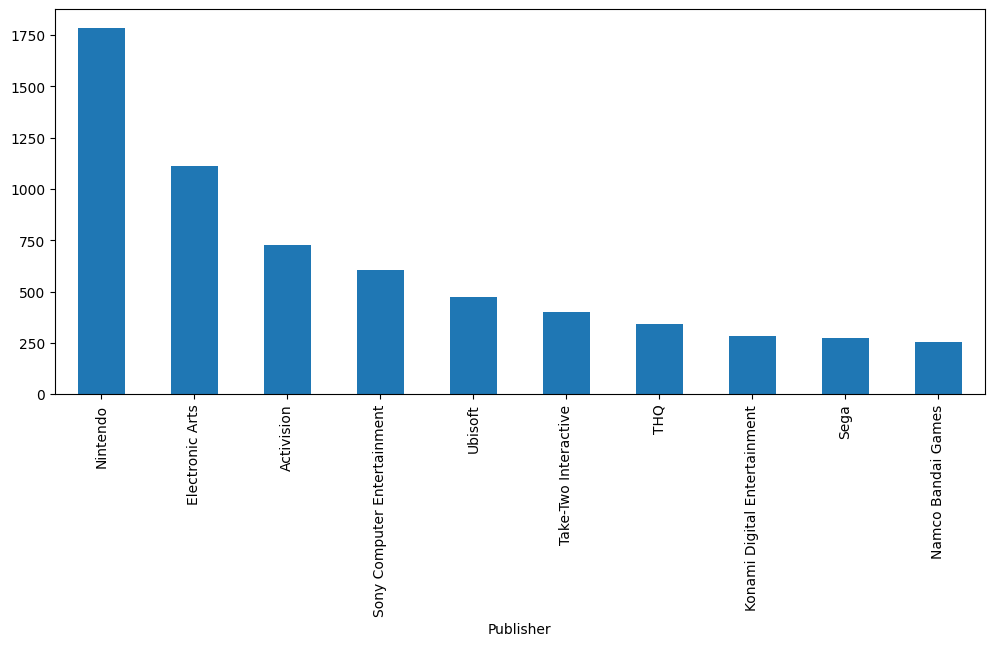

In [47]:
per_publisher_sale = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 5))
per_publisher_sale.plot(kind='bar')
plt.show()

In [48]:
publisher_sale_df = df[['Publisher','NA_Sales', 'EU_Sales','JP_Sales','Global_Sales']]
publisher_sale_df = publisher_sale_df.groupby('Publisher').sum().reset_index().sort_values('Global_Sales', ascending=False)
# publisher_sale_df.to_csv('../data/publisher_sales.csv')
publisher_sale_df


,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
359,Nintendo,816.87,418.74,455.42,1786.56
138,Electronic Arts,595.07,371.27,14.04,1110.32
21,Activision,429.70,215.53,6.54,727.46
456,Sony Computer Entertainment,265.22,187.72,74.10,607.50
525,Ubisoft,253.43,163.32,7.50,474.72
...,...,...,...,...,...
375,Ongakukan,0.00,0.00,0.01,0.01
96,Commseed,0.00,0.00,0.01,0.01
495,Takuyo,0.00,0.00,0.01,0.01
76,Boost On,0.00,0.00,0.01,0.01


PARTITIONS: 
  NA_Sales: 49.23 %
  EU_Sales: 27.28 %
  JP_Sales: 14.48 %


<function matplotlib.pyplot.show(close=None, block=None)>

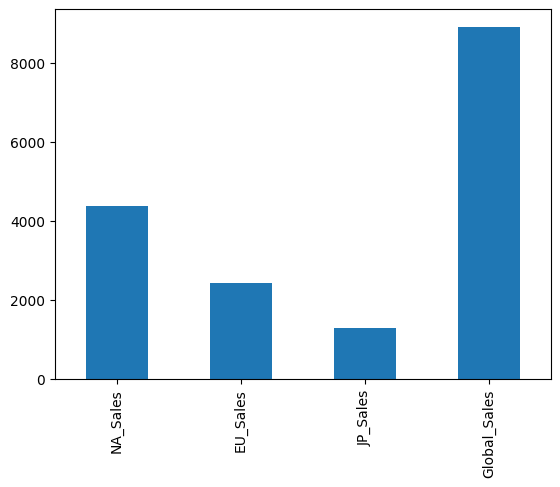

In [55]:
total_sales_per_reg = publisher_sale_df.iloc[:, 1:].sum()
total_sales_per_reg.plot(kind='bar')
na_sales_part = math.floor((total_sales_per_reg[0]/total_sales_per_reg[-1])*10000) / 100
eu_sales_part = math.floor((total_sales_per_reg[1]/total_sales_per_reg[-1])*10000) / 100
jp_sales_part = math.floor((total_sales_per_reg[2]/total_sales_per_reg[-1])*10000) / 100
print(f'PARTITIONS: \n  NA_Sales: {na_sales_part} %\n  EU_Sales: {eu_sales_part} %\n  JP_Sales: {jp_sales_part} %')
plt.show